In [1]:
from fastai.vision.all import *
import ipywidgets as widgets
from ipywidgets import VBox

In [2]:
path = '../input/the-simpsons-characters-dataset/simpsons_dataset'


In [3]:
dls = ImageDataLoaders.from_folder(path, train=path, valid_pct=0.2, 
                                   seed=4, item_tfms=Resize(224))

In [4]:
learn = vision_learner(dls, resnet34, metrics = [accuracy,error_rate])
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.838974,0.462897,0.871969,0.128031,06:33


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.225594,0.128067,0.966798,0.033202,06:18
1,0.132951,0.067237,0.981966,0.018034,06:22
2,0.033469,0.030472,0.992476,0.007524,06:22
3,0.019112,0.023826,0.994506,0.005494,06:25


In [5]:
#doc(ImageDataLoaders.from_folder)

In [6]:
images = get_image_files('../input/the-simpsons-characters-dataset/')

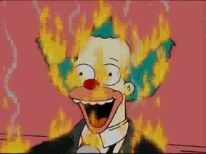

In [7]:
img = PILImage.create(images[51])
img

In [8]:
lbl, _, probs = learn.predict(img)
print(f"This is {lbl}.")

This is krusty_the_clown.


In [9]:
test = '../input/simpsons-test/bart_opt_wodqc5.jpg'

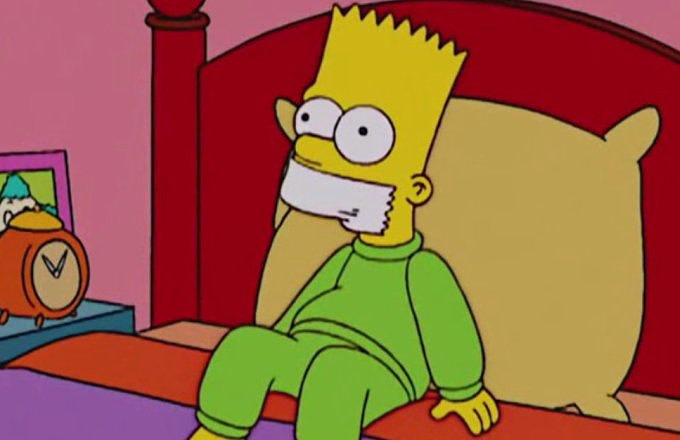

In [10]:
img1 = PILImage.create(test)
img1

In [11]:
lbl1, idx, probs = learn.predict(img1)
print(f"This is {lbl1}.")
print(f"Probability it's {lbl1}: {probs[idx.item()].item():.3f}")

This is bart_simpson.
Probability it's bart_simpson: 1.000


In [12]:
learn.export('/kaggle/working/model.pkl')

In [13]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('model.pkl')]

In [14]:
learn_inf = load_learner('/kaggle/working/model.pkl')

In [15]:
#learn_inf.dls.vocab

In [24]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [25]:
img = PILImage.create(btn_upload.data[-1])

In [26]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [27]:
pred,pred_idx,probs = learn_inf.predict(img)

In [28]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: bart_simpson; Probability: 1.0000')

In [29]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [30]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability:{probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [31]:
VBox([widgets.Label('Select your Simpson character!'),
      btn_upload, btn_run, out_pl, lbl_pred])